# Deep Learning and Neural Networks Second Assignment 2023 -- Mini Projects Only

## Ferenc Huszár and Nic Lane

### due date: Friday, 28 April 2023, 12:00 PM

This a supplementary file that includes a revised description of the mini-projects. Note, only the description of E2 has changed.

There are a total of 70 marks available for the entire second assessment ($70\%$ of the total of 100 marks for the course), the mini-projects descibed in this document have a maximum score of 40 marks. Other components of the second assignment (not described in this file) are worth a total of 35 marks.

#### Mini-projects


Mini-project tasks are a more exploratory and open-ended, giving you an opportunity to decide which aspect you'd like to focus on. The idea is to introduce you to the form of assessment typical in our Part III/MPhil modules. Mini-projects come with instructions, to indicate the depth of work we expect for certain marks, but you should feel free to deviate from instructions if you have a better idea to explore within the context.

As a guide, when marking we will take into account three factors:

* **extent of work:** did you do the expected amount of work (you won't get extra marks by doing a lot more than others, this is not a race). We will try to give an indication of this in the module description.
* **correctness/technical quality:** is your solution and description of findings technincally correct, does it demonstrate learning and understanding of the topics we cover?
* **presentation:** How is the mini-project written up? You want the writeup to be short, to the point, well structured. Are figures well formatted, so it's clear what's shown on them (e.g. are there axis labels)?

You can choose whichever project you want to attempt. You can attempt more than one, but we will only mark one. **Please clearly state which of the mini-projects you would like us to mark**, if this is unclear, we will mark whichever appears fist in your submitted notebook.

# E: Mini-Project

*40 marks*

Please **choose one** of the proposed mini-project questions below. Add as many text and code cells under the heading as you'd like. You may attempt more than one, but we will only mark one: please write below which mini-project you'd like to get marked on:

**I would like my solution for mini-project E3 to be marked.**

## E.1: CNN Loss Landscape.

A loss landscape is a visual representation (2D or 3D) of the relationship between a model's parameters and its loss function calculated a given dataset. It is usually represented as a high-dimensional surface, where the height of the surface at any point represents the value of the loss function for a particular combination of parameter values. By analyzing the shape of this surface, researchers can gain insights into the behavior of machine learning models, and can develop more efficient algorithms for training them.

The loss landscape can be affected by a variety of factors, including the architecture of the model, the choice of optimization algorithm, and even the batch size used during training.




![](https://github.com/pedropgusmao/loss-landscape/raw/master/doc/images/resnet56_noshort_small.jpg)
![](https://github.com/pedropgusmao/loss-landscape/blob/master/doc/images/resnet56_sgd_lr=0.1_bs=128_wd=0.0005/model_300.t7_weights_xignore=biasbn_xnorm=filter_yignore=biasbn_ynorm=filter.h5_%5B-1.0,1.0,51%5Dx%5B-1.0,1.0,51%5D.h5_train_loss_2dcontour.jpg?raw=true)

In this mini-project you will have the opportunity to analyse the effects of training a network using various sets of hyper-paramenter on the final solution and, most importantly, on its vicinity.


#### Loss Landscape Exploration (~20 marks)

In this first part of the mini-project, you will analyse the effects of changing network architecure, training batch size, optimizer, and the use of weight decay for SGD. For this, you will:
* Use the code provided [in this repository](https://github.com/pedropgusmao/loss-landscape) to produce 2D and 3D representations of loss functions for various architectures.
* Compare the various plots (all networks) to the *VGG9* baseline model trained using *Stochastic Gradient Decent*, batch size *128*, learning rate of *0.1*, and *no weight decay* (i.e., the *sgd_lr=0.1_bs=128_wd=0.0_save_epoch=1* model).
* Report your findings and explain the differences you see. We suggest you use the **train_loss_2dcontour.pdf** plots for your analysis as they contain more information.

*Tip: Generating all plots may require a lot of time and compute. Feel free to use the plots that come with the **Pre-trained models** instead to help you save time.*

#### Network Trajectories (~20 marks)
During the second part of your mini-project, you are asked to plot and analyse the trajectory of your network.
* Follow the instructions under the repository's **Plotting the network trajectory** section to generate plots for various sets of hyper-parameters.
* Compare how quickly your models converge and in which directions.
* What can you say about the region where the models converged to?
* Can you relate flatness with generalization?  

Code examples have been forked from the [original code](https://github.com/tomgoldstein/loss-landscape) for the paper *Visualizing the Loss Landscape of Neural Nets, Li, Hao, et al. 2018*. This forking was done by Pedro P.B. Gusmão (pp524@cl.cam.ac.uk) and in addition to contacting Nic and Ferenc questions, especially about this code, feel free to contact him. Relevant parts of the forked repository are identified with the tag **(mini-project)**.


## E.2: Transfer Learning

Throughout the course, you were able to train a few models to solve the task of object classification where each image in a dataset is associated with a single class $c$ from a pre-defined set of classes.</p>

Closely related to this is the problem of object detection, where each image may contain multiple objects at different locations and it is your job to both localise and classify such objects.

Clearly one problem *contains* the other and it is natural to think that solving one (classification) could help solve the other. Instead, it is a bit less obvious whether or not an object detection network trained to detect object from a set of classes $C$ can be slightly modified to detect objects from a different set of classes $D$.

In this project you will learn how to modify a pre-trained network to work on a different set of classes in a process called **Transfer Learning**.  

![](https://upload.wikimedia.org/wikipedia/commons/2/2d/Intersection_over_Union_-_object_detection_bounding_boxes.jpg)

Your task is to investigate adapting an object-detection network, originally trained on one dataset, to work on a different dataset.

You will start with a [Faster R-CNN](https://pytorch.org/vision/main/models/faster_rcnn.html) object detection network, originally trained to detect objects in the [COCO dataset](https://cocodataset.org/#home), and your task is to make it detect objects in the [German Traffic Sign Detection Benchmark (GTSDB)](https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip).

The trick behind Transfer Learning is to retain network information from the original task that is still relevant to the new task and retraining the parts that cannot be reused. This can be done by freezing weights that ought to be kept and fine-tuning or even fully retraining those that are to be updated.

It is essential that you understand the architecture of your network.
The Faster R-CNN is composed of three sub-networks:
1. A backbone object classification network, that produces feature maps (responsible for extracting features).
2. A Region Proposal Network (RPN), which generates bounding boxes, each with an objectness score.
3. A Classification Layer, that will warp the regions proposed by the RPN and classify them according to our set of classes. This sub-network is highly dependent on the task and on the number of classes being considered.

Note: The link to the GTSDB above contains sample images for each individual class/traffic sign (43 in total), along with 900 images taken from a driver's point of view. The ground-truth file ‘gt.txt’ contains a list of all detections occurring in the dataset, including image file name, bounding-box position and traffic-sign class ID. You are responsible for partitioning the dataset into train, validation and test.

#### Experimental Exploration (25 marks)
Please, follow these steps in your exploration of transfer learning:

1. Retrain just the classifier whilst freezing the rest of the network:
* First, load a _Faster R-CNN_ pre-trained on COCO.
* Second, freeze all layers except for the Classification Layer.
* Train, evaluate and test on the GTSDB dataset.
* Report results.
2. Fine-tune the network on the new dataset:
* First, load a _Faster R-CNN_ pre-trained on COCO.
* Don’t freeze anything.
* Train, evaluate and test on the GTSDB dataset
* Report results.
3. Train Faster R-CNN on GTSDB from scratch:
* Load a _Faster R-CNN_ with random weights.
* Don’t freeze anything.
* Train, evaluate and test on the GTSDB dataset
* Report results.
4. BONUS: Train Faster R-CNN on GTSDB from scratch: _(note, 5 extra marks available)_
* Repeat the experiments above using a _different backbone_ network like the MobileNet.
* Report results.

When reporting your results, consider the training time per epoch and the total number of correctly detected objects. Feel free to fix a maximum number of epochs for which you will train all the above configurations

#### Reflection on Experiments (~15 marks)
Consider the following questions:
 * How long did it take to train the detection network from scratch?
* How well did these networks perform on training, evaluation and test sets?
* Did freezing the backbone network help speed up training?
* Was there a loss in performance between using transfer learning and training from scratch?
* BONUS: _(note, 5 extra marks available)_ Which backbone works best? Is it better to have a larger backbone pre-trained on larger datasets or a smaller backbone directly trained on the target dataset?







## E.3: Model compression via Weight Matrix Decomposition

Model compression is the generic name used to refer to techniques applied to model architectures so that they can be more system resource efficient -- especially at inference time. (If you wish to read more about this area feel free to consult this [tutorial](https://arxiv.org/abs/1703.09039), but note it is not needed in this assignment.) In this mini-project, you will have the opportunity to explore one of these methods that involves decomposing a single large weight matrix of an architecture into a series of smaller matrices to reduce memory and compute needs, while still maintaining accuracy levels of the original model.

A popular early approach of this type involved using matrix factorization methods (like SVD) and applying them to layers within an architecture where the weight matrix causes performance bottlenecks for the whole model. In this case a single weight matrix is broken down into two smaller matrices, the product of which approximates the original larger matrix.

This mini-project is comprised by the following following steps and questions below. We ask that you work with a pretrained [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) and the ImageNet dataset. We will be using SVD to perform the matrix factorization:

* Applying SVD decomposition to AlexNet's fully-connected (dense) layers *(~10 marks).*
  * Perform SVD on the weight matrix of the first fully-connected layer of AlexNet. The weight matrix of the layer will be decomposed into two matrices ($U$ and $V$ by SVD) *(note, feel free to use a library implementation of SVD)*.
  * Under which conditions will the use of the $U$ and $V$ matrices above, when used in place of the weight matrix, result in parameter savings?
  * Implement a new layer type that you can use to replace the fully-connected layers within AlexNet. This new layer type should replace the single weight matrix in a conventional fully-connected layer with the $U$ and $V$ matrices. Include a parameter in your layer that determines how many singular vectors are used (parameter $k$ within SVD) *(note, you only need to implement the forward-pass of this layer given how we use it next)*.
  * Replace both fully-connected layers within AlexNet with your new layer type developed above. Experiment by varying the values of $k$ and see how this changes the test accuracy of the model *(note, to speed-up experiments only compute accuracy for a 128-example subset of ImageNet test data, also only use $k$ values that result in an overal reduction of parameters in the model)*.
* Implementing the SVD decomposition as two seperate layers *(~20 marks).*
  * Show that the new layer you implemented above, to support the decomposition of weights, can also be viewed (and implemented) as two seperate layers. Provide an illustration to show this is possible, and also provide a new implementation of a layer type to support this *(note, again at this stage only the forward pass of the implementation is required)*.
  * Describe the implications to the per-layer working set memory at inference time (defined during lectures) of implementing weight decomposition as two layers compare to when it is implemented as a single layer?
* Re-training your SVD decompositions *(~10 marks).*
  * Implement the backwards pass of the two-layer approach to supporting SVD-based weight decomposition.
  * Re-train the AlexNet model with both fully-connected layers using this two-layer implementation *(note, you must re-train all model parameters, not just those related to the fully-connected layers)*. Did test accuracy improve? *(please use the 128-example subset of ImageNet used earlier)*. If you observe an improvement discuss why this is the case.
  * Comment on the similarity and design considerations of your modified version of AlexNet to the MobileNet architecture discussed in lectures.
  


## E.4: Investigating Gradient Stabilization

As Ferenc mentioned during his lectures gradient instability is a fundemental barrier to successful training. In this mini-project we will dive into this issue.

Before beginning, construct a version of MobileNetV2 from which you have removed the architectural components that manage the gradient. That is remove from it batch normalization layers and residual connections. We will use this "stripped" version of MobileNetV2 multiple times below (we call it below "stripped MobileNetV2"). You will recall this architecture from the prior assignment.

*As a hint: you will also find it useful to implement a helper function that computes the average gradient at each layer when provided a batch of training examples.*

* Early Training Gradient Stabilization *(~10 marks).*
  * Use the stripped MobileNetV2 described above and begin by initalizing it (rather than using any pretrained weights). Create three versions related to three initialization schemes: (1) all parameters set to a constant; (2) all set as random uniform; (3) all set using Xavier initialization (i.e., use the default PyTorch initialization). (For some background on this topic consult this [paper](https://arxiv.org/abs/1704.08863).)
  * Visualize the gradients generated when training these three networks using one batch of data taken from ImageNet, holding everything else constant. *(note, use the visualization helper function described earlier)*. Briefly comment on the differences you see. Expand your set of experiments by also testing with at least three different constants for the first scheme described (e.g., try using: $0$, $1$, $1000$).
* Mid-Training Gradient Stabilization *(~20 marks).*
  * We will now investigate gradients that are in-use during *mid-training*. These gradients will be available if you take the original MobileNetV2 architecture amd train it for three epochs using ImageNet using all the settings (e.g., initalizer etc.) detailed in the original [paper](https://arxiv.org/abs/1801.04381). Copy the weights of this network to the "stripped" MobileNetV2.  
  * Investigate the role played by the residual connections. Insert the residual connections back to the model, and backpropagate a single batch (ImageNet). Collect and visualize the gradients using your helper function. Comment on what are the effects of inserting the residual connections back to the early, middle, and the final layers of the network.
  * Next, investigate the role played by the batch normalization. Insert the batch normalization layers back to the model, and backpropagate a single batch through the model. Collect and visualize the gradients using your helper function. Comment on what effects does inserting the batch normalization back to the beginning, middle, and the end of the network have. *(note, use the batch normalization in its training mode)*.
  * Compare the effects of the residual connections and the batch normalizations.
* Gradients - Going Beyond Training *(~10 marks).*
  * For this final exploration, revert back to a pretrained MobileNetV2 without any changes to the architecture. In the following steps we will freeze the model's parameters, and propagate gradients into the input.
  * Define a simple loss function that is minimized when the output activation corresponding to one ImageNet class is maximized and all other classes have 0 value. (Let's call this class $C$, you can select any ImageNet class you wish).
  * Given this loss, now identify an input image that would minimize the loss. Perform a test where you initialize an input in four different ways: (1) all zeros; (2) random; (3) image of the class $C$; (4) image not of the class $C$. Compute the gradients of the loss function with respect to the pixels in the input image. *(note, the network parameters are held constant!)* Update the image using these gradients. Repeat gradient computation and update until image stops changing.
  * Comment on training the image. What kind of image did you arrive at -- is it representative of the class you were training towards? How did the image change as you were "training" it? And, what difference did the initialization strategies make - did you arrive at different final images and if so then why? If not, then why not?

# SVD task

## SVD and Model compression

SVD is a matrix decomposition technique which has applications in model compression. Modern CNNs are often over-parameterised and equivalent results can often be achieved with much smaller models, as shown in [this paper](https://arxiv.org/pdf/1306.0543.pdf).

I shall follow a simple methodology to decompose the weight matrix $W$ ($m\times n$) into two matrices $U$ and $N$:
- Set a parameter $k\leq rank(W)$. This is because the rank of the matrix $W$ is exactly equal to the number of non-zero singular values of the matrix, which is also the maximum we'd want $k$ to take.
- Perform SVD on $W$ to get $\tilde{U}$, $\tilde{\Sigma}$, $\tilde{V}$ where $\tilde{U}$ is of size $m\times p$, $\tilde{V}$ is of size $n \times p$, and $\tilde{Sigma}$ is a diagonal matrix of size $p \times p$ with the diagonal being the singular values, where $p=\min(m, n)$ and such that $\tilde{U}\tilde{Σ}\tilde{V}^T = W$.
- As the singular values indicate the 'importance' of the corresponding column in $\tilde{U}$ and row in $\tilde{V}^T$ and are, in the decomposition resulting from SVD, ordered decreasingly, we can simply approximate the matrix with $U_k\Sigma_k V_k^T$ where the subscript $k$ means that we are taking the _first $k$ columns_, i.e. $U_k$ is a $m \times k$ matrix, and $V_k$ is a $n \times k$ matrix,, and $\Sigma_k$ is a $k \times k$ diagonal matrix.
- We can simplify this into two matrices $U \times N$ such that $N = \Sigma_k V_k^T$ and $U = U_k$.

Then, for there to be any paramater saving, we ought to take a small $k$: the original space cost was $mn$ (units), the new one will be $k(m+n)$. For there to be any saving, we clearly need that $k < \frac{mn}{m+n}$.

In reality, we know that the rank $r$ of $W$ is the number of its non-zero singular values, so we can start from taking $k=r$, and any $k$ smaller than $r$ will result in loss of information, which, when the information is rather sparse, can be worth it.

## Setup

In [ ]:
import torch
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
import copy

In [ ]:
device = 'cuda:0'
torch.manual_seed(1337)

### CIFAR-10

I chose to have a model trained on CIFAR-10 from the `chenyaofo/pytorch-cifar-models` torch hub repository. To replicate the training conditions, I need to set things up as per how the pre-trained model was trained in https://github.com/chenyaofo/image-classification-codebase, with the training and testing transforms setup as follows.

In [ ]:
import torchvision
import torchvision.transforms as T

In [ ]:
# from https://github.com/chenyaofo/image-classification-codebase/blob/master/conf/cifar10.conf
mean= [0.4914, 0.4822, 0.4465]
std= [0.2023, 0.1994, 0.2010]
# from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [ ]:
# from https://github.com/chenyaofo/image-classification-codebase/blob/master/codebase/data/cifar.py

def get_val_transforms(mean, std):
    return T.Compose([
        T.ToTensor(),
        T.Normalize(mean=mean, std=std)
    ])

In [ ]:
test_dataset = torchvision.datasets.CIFAR10("./CIFAR-10-data/test", train=False, download=True, transform=get_val_transforms(mean, std))

Files already downloaded and verified


### Model

We now download the model. I chose this model in particular mainly because it has 3 big linear layers with 500k+ parameters. To be able to use SVD to achieve space saving, we want to deal with big and sparse matrices with much lower ranks than their sizes. This allows us to decompose the matrix into $U$ and $N$ with a really small parameter $k$ which enables great savings, while still achieving similar performance on our test set.

In [ ]:
from pprint import pprint
pprint(torch.hub.list("chenyaofo/pytorch-cifar-models", force_reload=True))

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or list(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use list(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/zipball/master" to /root/.cache/torch/hub/master.zip


['cifar100_mobilenetv2_x0_5',
 'cifar100_mobilenetv2_x0_75',
 'cifar100_mobilenetv2_x1_0',
 'cifar100_mobilenetv2_x1_4',
 'cifar100_repvgg_a0',
 'cifar100_repvgg_a1',
 'cifar100_repvgg_a2',
 'cifar100_resnet20',
 'cifar100_resnet32',
 'cifar100_resnet44',
 'cifar100_resnet56',
 'cifar100_shufflenetv2_x0_5',
 'cifar100_shufflenetv2_x1_0',
 'cifar100_shufflenetv2_x1_5',
 'cifar100_shufflenetv2_x2_0',
 'cifar100_vgg11_bn',
 'cifar100_vgg13_bn',
 'cifar100_vgg16_bn',
 'cifar100_vgg19_bn',
 'cifar100_vit_b16',
 'cifar100_vit_b32',
 'cifar100_vit_h14',
 'cifar100_vit_l16',
 'cifar100_vit_l32',
 'cifar10_mobilenetv2_x0_5',
 'cifar10_mobilenetv2_x0_75',
 'cifar10_mobilenetv2_x1_0',
 'cifar10_mobilenetv2_x1_4',
 'cifar10_repvgg_a0',
 'cifar10_repvgg_a1',
 'cifar10_repvgg_a2',
 'cifar10_resnet20',
 'cifar10_resnet32',
 'cifar10_resnet44',
 'cifar10_resnet56',
 'cifar10_shufflenetv2_x0_5',
 'cifar10_shufflenetv2_x1_0',
 'cifar10_shufflenetv2_x1_5',
 'cifar10_shufflenetv2_x2_0',
 'cifar10_vgg11_bn

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
model = torch.hub.load("chenyaofo/pytorch-cifar-models", "cifar10_vgg11_bn", pretrained=True)
count_parameters(model.classifier), count_parameters(model), model

Using cache found in /root/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master
Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/releases/download/vgg/cifar10_vgg11_bn-eaeebf42.pt" to /root/.cache/torch/hub/checkpoints/cifar10_vgg11_bn-eaeebf42.pt
100%|██████████| 37.3M/37.3M [00:00<00:00, 43.7MB/s]


(530442,
 9756426,
 VGG(
   (features): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (2): ReLU(inplace=True)
     (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (6): ReLU(inplace=True)
     (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (10): ReLU(inplace=True)
     (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (13): ReLU(i

### Baseline performance

In [ ]:
batch_size = 16

In [ ]:
model = model.to(device)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [ ]:
def get_accuracy(model):
  correct = 0
  total = 0
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = model(images.to(device))
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels.to(device)).sum().item()
          for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[classes[label.to(device)]] += 1
            total_pred[classes[label]] += 1
  accuracy = correct/total
  accuracies = {}
  for classname, correct_count in correct_pred.items():
    accuracies[classname] = 100 * float(correct_count) / total_pred[classname]
  return accuracy, accuracies

In [ ]:
get_accuracy(model)

(0.9117,
 {'plane': 89.9,
  'car': 94.5,
  'bird': 87.2,
  'cat': 83.9,
  'deer': 91.5,
  'dog': 84.7,
  'frog': 95.7,
  'horse': 93.9,
  'ship': 94.6,
  'truck': 95.8})

In [ ]:
# Test loader for quick testing with 128 samples
dummy_testloader = torch.utils.data.DataLoader(test_dataset, batch_size=128,
                                              shuffle=False, num_workers=2)
test_data = next(iter(dummy_testloader))

In [ ]:
def get_accuracy_128(model):
  correct = 0
  total = 0
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}
  with torch.no_grad():
    images, labels = test_data
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.to(device)).sum().item()
    for label, prediction in zip(labels, predicted):
      if label == prediction:
          correct_pred[classes[label.to(device)]] += 1
      total_pred[classes[label]] += 1
  accuracy = correct/total
  accuracies = {}
  for classname, correct_count in correct_pred.items():
    accuracies[classname] = 100 * float(correct_count) / total_pred[classname]
  return accuracy, accuracies

In [ ]:
baseline_acc = get_accuracy_128(model)
baseline_acc

(0.9375,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 90.9090909090909,
  'cat': 100.0,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 94.73684210526316,
  'horse': 84.61538461538461,
  'ship': 100.0,
  'truck': 100.0})

## Perform SVD on the network's dense layers

We perform the first stage of exploration in the following steps, as specified by the instructions above:
* We first perform SVD on the weight matrix of the first fully connected layer of VGG 11 by SVD, to see how SVD works.
* We then explore *when* the use of decomposed matrices $U$ and $N$ will result in parameter savings
* Finally, we test the loss in performance of using the SVD-based low rank approximation of the weight matrix by implement a new layer where we replace weight matrix $W$ by $UN$. We can experiment on by varying the values of $k$.

Note that at this stage, we do *not* expect any parameter gains. This stage is present in order to *understand the optimisation we are performing* *a priori*.



### Perform SVD on the first layer

We now experiment with performing SVD on the first linear layer of the model.

In [ ]:
model_svd = copy.deepcopy(model)
model_svd.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
weight = (model_svd.classifier[0].weight.detach())

We compute the shape and an estimate of the rank of the weight matrix to get our $m$, $n$ and initial $k=r$

In [ ]:
weight.shape, torch.linalg.matrix_rank(weight)

(torch.Size([512, 512]), tensor(257, device='cuda:0'))

Then, we perform SVD on the weight matrix

In [ ]:
U, S, Vh = torch.linalg.svd(weight)

In [ ]:
U.shape, S.shape, Vh.shape

(torch.Size([512, 512]), torch.Size([512]), torch.Size([512, 512]))

In [ ]:
N = torch.diag(S) @ Vh

Clearly even with computing SVD (without any cutting) we already get *some* error due to the approximative nature of such numerical algorithms. However, it is clear that such approximation errors (average of around order 1e-6) remain low wrt the size of the weights (around order 1e-7) and roughly, we still have that $UN \approx W$.

In [ ]:
torch.mean(torch.abs(weight))

tensor(0.0046, device='cuda:0')

In [ ]:
torch.mean(torch.abs(weight -  U @ torch.diag(S) @ Vh))

tensor(5.3903e-07, device='cuda:0')

We can indeed visualise our singular valuesa and see that the first few singular values seem really important (with a big size). We then witness a sharp drop at around the 10th singular value, and any singular value after the 256th (0-indexed) is really small and has very little impact on the final value. We can further check this by re-multiplying the decomposed matrices. It is worth noting that while 257 was the computed rank, the singular values after that are *not* 0, but are smaller than some threshold, which is why the rank was computed as 257. In the subsequent sections, we shall use this rank *estimate* as a way to force the implemented SVD layers to ignore the computed singular vectors with a small singular value.

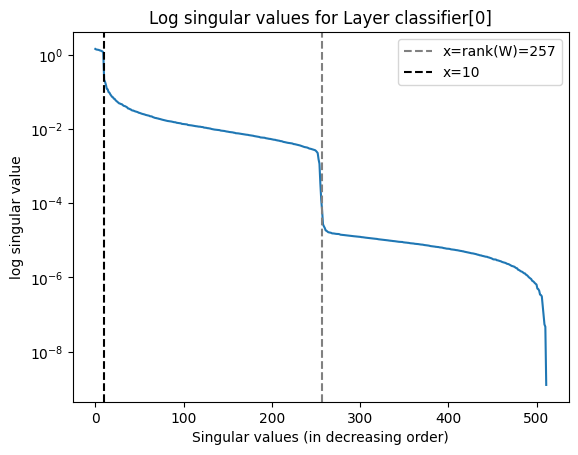

In [ ]:
def visualise_singular_values(fig, ax, weight_matrix, name, show_legend=True):
  _, S, _ = torch.linalg.svd(weight_matrix)
  r = torch.linalg.matrix_rank(weight_matrix.detach().cpu())
  ax.plot(range(len(S)), (S.detach().cpu()))
  ax.axvline(r, linestyle="--", color="gray", label=f"x=rank(W)={r}")
  ax.set_yscale('log')
  ax.set_xlabel('Singular values (in decreasing order)')
  ax.set_ylabel('log singular value')
  ax.set_title(f'Log singular values for {name}')
  if show_legend:
    ax.legend()

fig, ax = plt.subplots()
visualise_singular_values(fig, ax, weight, "Layer classifier[0]", False)
plt.axvline(10, linestyle="--", color="black", label="x=10")
plt.legend()
plt.show()


Now we try to drop the columns And we drop columns in $U$ and rows in $N$ above $k=r=257$. We shall see that the (mean) absolute difference hasn't evolved that much, which does in a way confirm that we aren't really changing anything by ignoring the cols in $U$ and rows in $N$ after the 257th, because the corresponding singular values would have been 0 so they won't affect the final result anyway.



In [ ]:
k = 257
U_257 = U[:, :k]
N_257 = N[:k, :]

In [ ]:
U_257.shape, N_257.shape

(torch.Size([512, 257]), torch.Size([257, 512]))

In [ ]:
torch.mean(torch.abs(weight -  (U_257 @ N_257)))

tensor(6.9326e-07, device='cuda:0')

Clearly, $U$ and $N$ give a combined number of parameters of $512\times 257 \times 2 = 263168$, whereas the original weight matrix gives $512^2=262114$ parameters. Thus we have *not* achieved any saving per se, in this particular case.

Finally we try to make $k$ smaller than $r$: let's try to do so at the first cusp in the singular values graph above. We get, as expected, with $k=10$, an approximation with a much bigger mean absolute error. However, this does enable parameter savings as $512\times 10 \times 2 < 512^2$, and we still do have a relatively low mean absolute error.

In [ ]:
k = 10
U_10 = U[:, :k]
N_10 = N[:k, :]

In [ ]:
U_10.shape, N_10.shape

(torch.Size([512, 10]), torch.Size([10, 512]))

In [ ]:
torch.mean(torch.abs(weight -  (U_10 @ N_10)))

tensor(0.0005, device='cuda:0')

### In general, when do we have gains in space consumption?

So when can we achieve gains in general?

Cf. Above. TLDR we have to ensure that $k < mn/(m+n)$, so in our case, we need that $k < (512^2)/(512 + 512) = 256$.

It is worth noting that here, $k$ is smaller than the rank of the weight matrix, which means that we lose information, and therefore should experience loss in model performance.

### Implement a new layer type

We now create a `SVDTestLayer` class to test the performance of our model with the approximations plugged in. I shall initialise at the minimum between the estimated rank and the maximum $k$ at which I can still achieve memory gains. Note however that at this stage we're only experimenting with variations of performance when we apply approximations.

Then, guided by the singular values of the weight matrix of each of the layers we replace, we can try to experiment with different values of $k$. The goal will be to preserve the top-1 accuracy.

In [ ]:
class SVDTestLayer(torch.nn.Module):
  def __init__(self, linear: torch.nn.Linear, k: int):
    super().__init__()
    # Enfore k <= rank(W)
    k = torch.min(torch.linalg.matrix_rank(linear.weight), torch.tensor(k))
    # Also enforce that k gives param gains: k <= floor(mn/m+n)
    m, n = linear.weight.shape[0], linear.weight.shape[1]
    k = torch.min(k, torch.floor(torch.tensor(m * n / (m + n))).int())
    U, S, Vh = torch.linalg.svd(linear.weight.detach(), full_matrices=False)
    N = torch.diag(S) @ Vh
    U = U[:, :k]
    N = N[:k]
    # Note that here we're not saving any space
    self.W = torch.nn.Parameter(U @ N, requires_grad=True)
    self.b = torch.nn.Parameter(linear.bias.detach(), requires_grad=True) if linear.bias is not None else None

  def forward(self, x):
    # print(self.N.shape, self.U.shape)
    return torch.nn.functional.linear(x, self.W, self.b)

In [ ]:
l = SVDTestLayer(model_svd.classifier[0], 192)

In [ ]:
l.W.shape, l.b.shape

(torch.Size([512, 512]), torch.Size([512]))

### Replace all layers and vary $k$

#### Preparation: Plotting the singular values graph

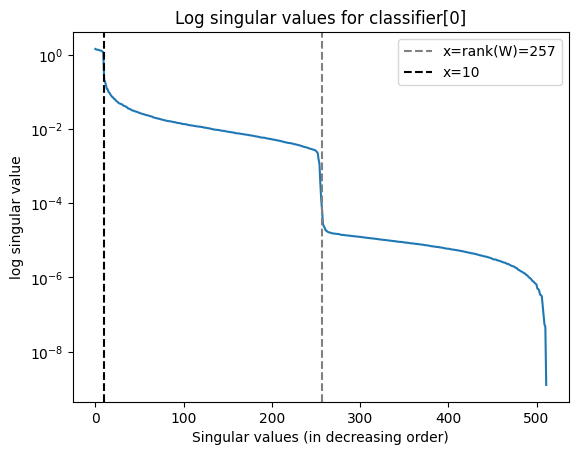

In [ ]:
fig, ax = plt.subplots()
visualise_singular_values(fig, ax, model_svd.classifier[0].weight, "classifier[0]", False)
ax.axvline(x=10, color="black", linestyle="--", label="x=10")
ax.legend()
plt.show()

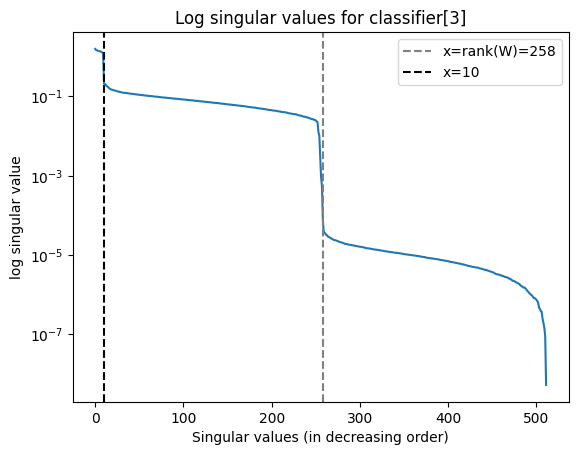

In [ ]:
fig, ax = plt.subplots()
visualise_singular_values(fig, ax, model_svd.classifier[3].weight, "classifier[3]", False)
ax.axvline(x=10, color="black", linestyle="--", label="x=10")
ax.legend()
plt.show()

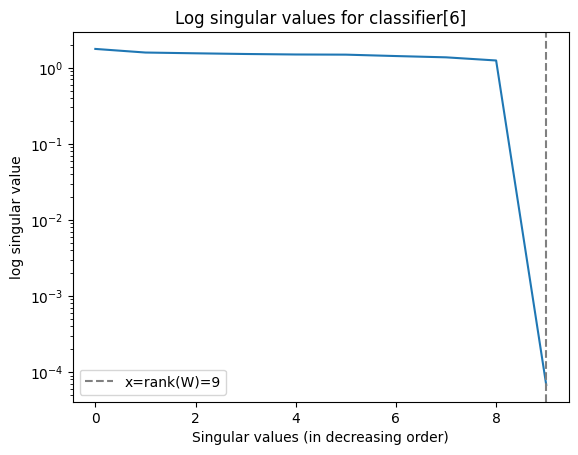

In [ ]:
fig, ax = plt.subplots()
visualise_singular_values(fig, ax, model_svd.classifier[6].weight, "classifier[6]")
plt.show()

We know as mentioned previously that the $i$th singular value corresponds to how much the $i$th col in $U$ and row in $N$ contributes to the weight matrix.

Therefore, from these graphs, we can **hypothesise** that the acccuracy of the model varies wrt $k$ exactly analogously.

In other words, for the layer 0, we expect that accuracy steadily goes up from taking 1 singular vector to taking 10, then goes up drastically, then increases steadily up to $k=257$, etc. Layer 3 should follow a similar trend. In fact, it is clear with the distribution of the size of the singular values that both of these layers are quite sparse.

Finally, for the output layer, it appears that the layer is pretty dense and therefore the accuracy will probably go up steadily up to recovering the original accuracy.

#### Experiments

We want to perform experiments varying the value of $k$ to see if our hypothesis holds.

For this purpose, we vary the value of $k$ independently for every layer replaced, which are layers 0, 3 and 6 in the `classifier` module, guided by their respective singular values, and investigate the value of $k$ at which we recover the baseline accuracy, i.e. the accuracy of the model without SVD.

We also study the variations in the accuracy of individual classes to see if we can have some insight.

In [ ]:
linear_layers = [copy.deepcopy(model_svd.classifier[0]), copy.deepcopy(model_svd.classifier[3]), copy.deepcopy(model_svd.classifier[6]),]
max_ks = []
for l in linear_layers:
  weight = l.weight.detach()
  m, n = weight.shape[0], weight.shape[1]
  max_ks += [torch.min(torch.linalg.matrix_rank(weight), torch.floor(torch.tensor(m * n / (m + n))).int())]


In [ ]:
max_ks

[tensor(256, device='cuda:0'),
 tensor(256, device='cuda:0'),
 tensor(9, device='cuda:0')]

In [ ]:
# Baseline
model_svd_base = copy.deepcopy(model_svd)
assert not model_svd_base.training
model_svd_base.classifier[0] = SVDTestLayer(linear_layers[0], max_ks[0])
model_svd_base.classifier[3] = SVDTestLayer(linear_layers[1], max_ks[1])
model_svd_base.classifier[6] = SVDTestLayer(linear_layers[2], max_ks[2])
base_acc = get_accuracy_128(model_svd_base)
base_acc

<ipython-input-39-50d40cde1954>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.min(torch.linalg.matrix_rank(linear.weight), torch.tensor(k))


(0.9375,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 90.9090909090909,
  'cat': 100.0,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 94.73684210526316,
  'horse': 84.61538461538461,
  'ship': 100.0,
  'truck': 100.0})

In [ ]:
from tqdm.notebook import tqdm


model_svd_test_bench = copy.deepcopy(model_svd_base)
assert not model_svd_test_bench.training
layer_indices = [0, 3, 6]
results = [[(0, {})], [(0, {})], [(0, {})]]
for i, (l, max_k,layer_index) in enumerate(tqdm(zip(linear_layers, max_ks, layer_indices))):
  for k in tqdm(range(1, max_k + 1)):
    # take 10 samples
    model_svd_test_bench.classifier[layer_index] = SVDTestLayer(l, k)
    results[i].append(get_accuracy_128(model_svd_test_bench))
  # Reinitialise
  model_svd_test_bench.classifier[layer_index] = SVDTestLayer(l, max_k)


0it [00:00, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

<ipython-input-39-50d40cde1954>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.min(torch.linalg.matrix_rank(linear.weight), torch.tensor(k))


  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
results_global = [[] for i in range(len(results))]
results_per_class = [{cls:[] for cls in classes} for i in range(len(results))]
for i in range(len(results)):
  for (global_res, local_res_dict) in results[i]:
    results_global[i].append(global_res)
    for cls in classes:
      results_per_class[i][cls].append(local_res_dict.get(cls, 0))

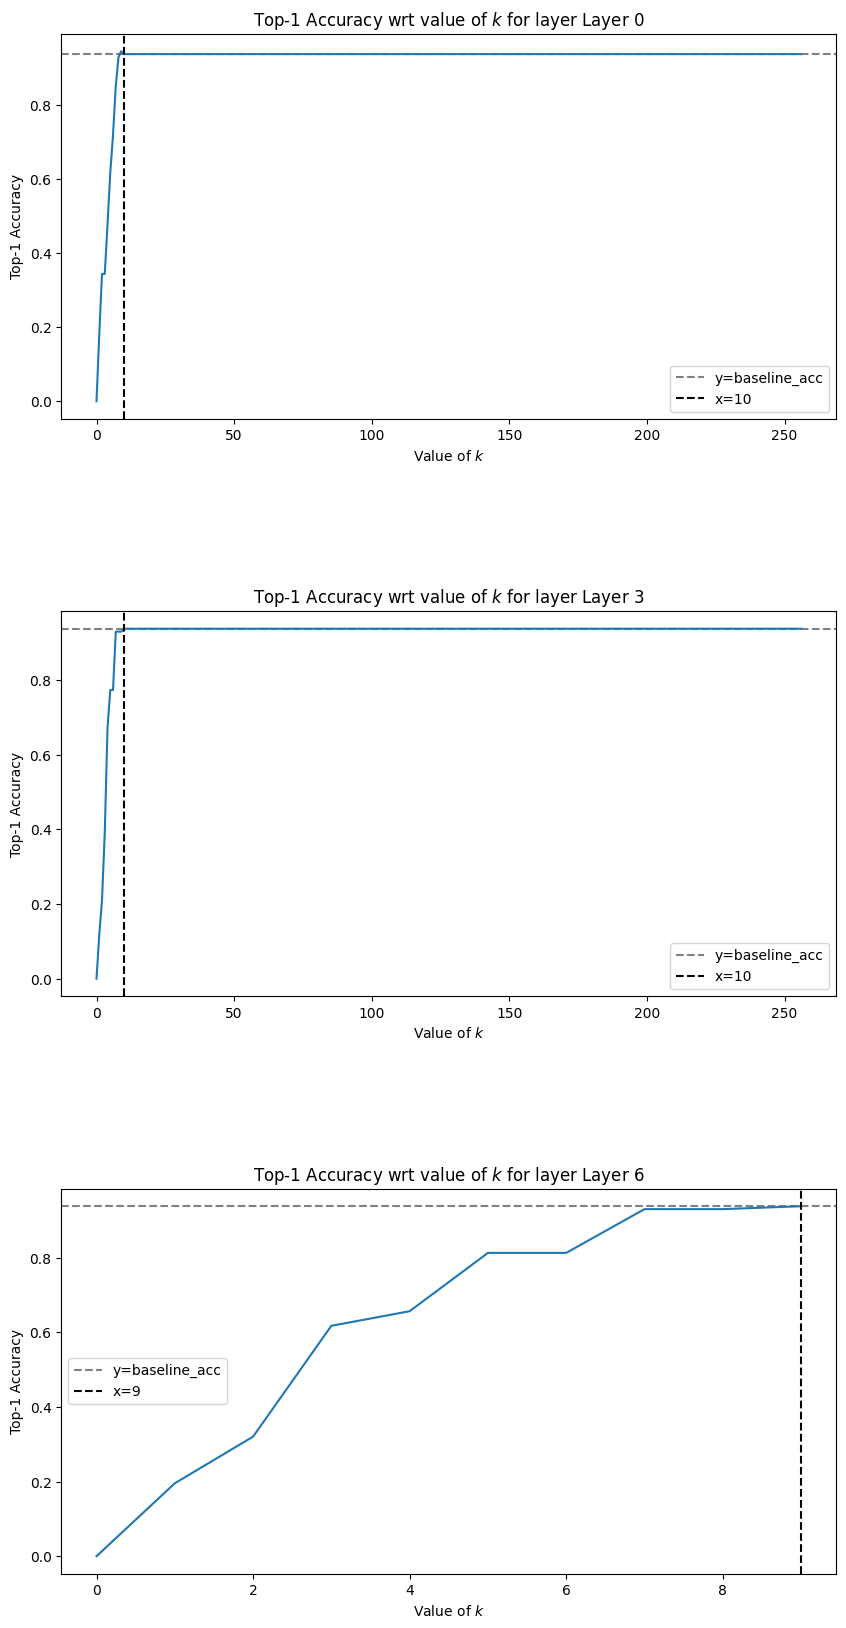

In [ ]:
def plot_results(fig, ax, result_global, layer_name):
  ax.plot(range(len(result_global)), result_global)
  ax.set_xlabel("Value of $k$")
  ax.set_ylabel("Top-1 Accuracy")
  ax.set_title(f"Top-1 Accuracy wrt value of $k$ for layer {layer_name}")

fig, axes = plt.subplots(3, 1, figsize=(10, 20))
fig.subplots_adjust(hspace=.5)
axes[0].axhline(y=baseline_acc[0], color="gray", linestyle="--", label="y=baseline_acc")
plot_results(fig, axes[0], results_global[0], "Layer 0")
axes[0].axvline(x=10, color="black", linestyle="--", label="x=10")
axes[0].legend()
axes[1].axhline(y=baseline_acc[0], color="gray", linestyle="--", label="y=baseline_acc")
plot_results(fig, axes[1], results_global[1], "Layer 3")
axes[1].axvline(x=10, color="black", linestyle="--", label="x=10")
axes[1].legend()
axes[2].axhline(y=baseline_acc[0], color="gray", linestyle="--", label="y=baseline_acc")
plot_results(fig, axes[2], results_global[2], "Layer 6")
axes[2].axvline(x=9, color="black", linestyle="--", label="x=9")
axes[2].legend()
plt.show()

Observation:

Recall that the baseline accuracy we got is 93.75%. In the text below, we denote by $k^*$ the value of $k$ at which the model accuracy reaches the set baseline.

We observe that for both layers 0 and 3, there's a sharp increase in accuracy up to $k_0^*=10$ and $k_3^*=10$ respectively to reach the baseline accuracy, and that the accuracy **stays the same** after that. This suggests that the singular vectors after the $k^*$th one are not really needed.

For layer 6, the value of $k$ increases steadily and reaches the required range only at $k_6^*=9$.

Both confirm our hypothesis partially: it turns out that after $k^*$, we have already reached the original accuracy, which suggests that the approximation of $W$ is already good enough with only the first $k^*$ singular vectors for each of the 3 linear layers.

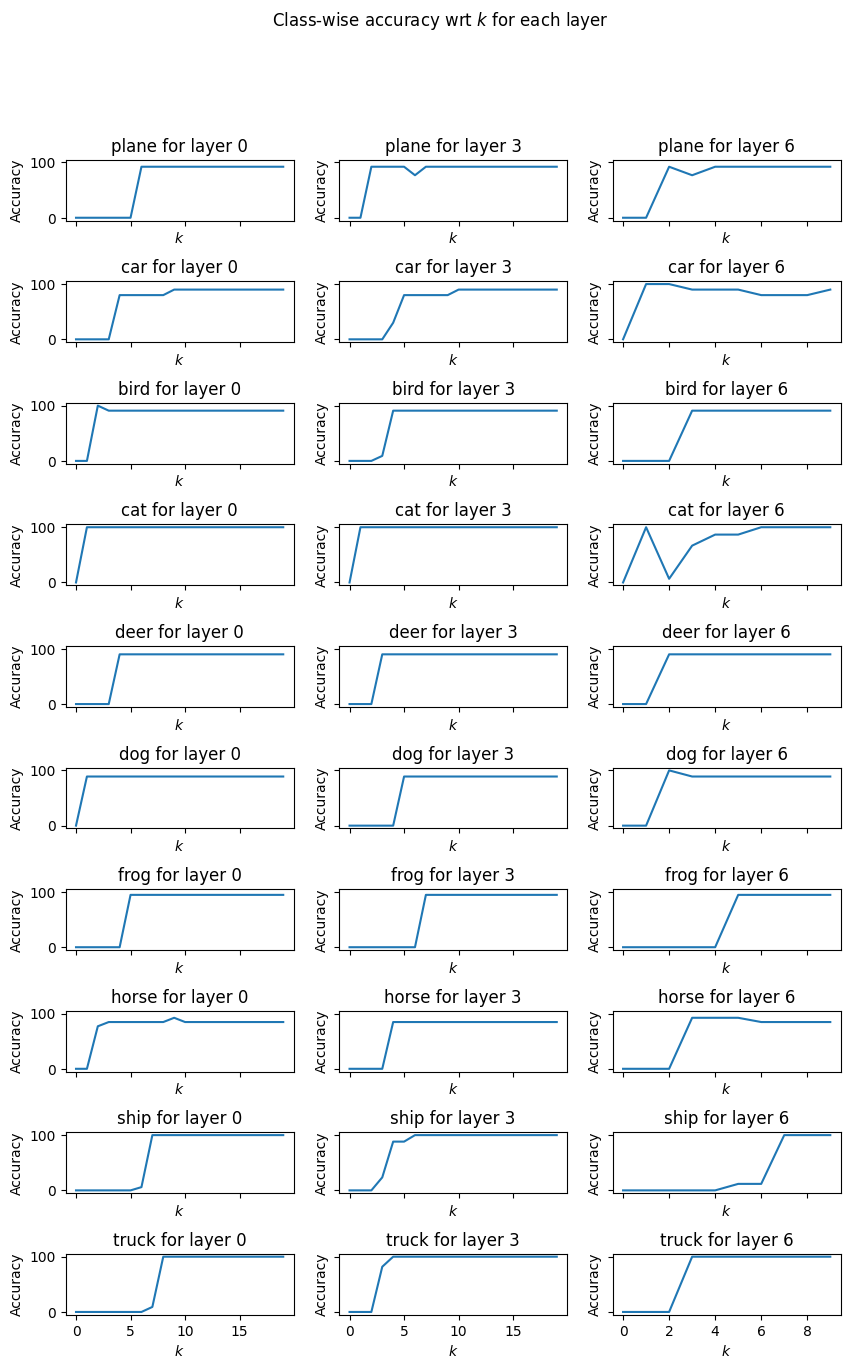

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(10, 15), sharex='col', sharey=True)
limits = [20, 20, 10]
for i, (result_per_class, limit, layer_name) in enumerate(zip(results_per_class, limits, [0, 3, 6])):
  for j, cls in enumerate(classes):
    ax = axes[j][i]
    result = result_per_class[cls]
    ax.plot(range(len(result[:limit])), result[:limit])
    ax.set_xlabel("$k$")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"{cls} for layer {layer_name}")
fig.subplots_adjust(hspace=1)

fig.suptitle("Class-wise accuracy wrt $k$ for each layer")
plt.show()


We now turn to the class-wise accuracies, and indeed, we make some surprising observations.

For each layer, for each class, we observe that when $k$ increases, the accuracy looks like a step function. It is first very close to zero up to some value of $k$, and then immediately jumps to somewhere close to 100%.

We hypothesise that certain singular values are *necessary* to classify certain image classes. To be more precise, I'm saying that characteristic features for certain classes might have a very big component along particular singular vectors. If particular singular values are removed, then the corresponding subspace spanned by the corresponding singular vectors will also be removed. Hence the model fails to classify those classes, while leaving other classes which don't depend on these singular values intact.

Note that this is a hypothesis that will be used in a later section, conjecturing on why fine-tuning on models with a low $k$ value improves performance.

#### Final performance:

We choose $k$ with the most savings and the least performance loss, i.e., $k=k^*$:
- $k$ = 10 for the layer 0
- $k$ = 10 for the layer 3
- $k$ = 9 for the layer 6

We get 93.75% accuracy on our 128 element small test set, and a bit more than 91% on the entire test set, which is exactly our original expected accuracy.

In [ ]:
model_svd_final = copy.deepcopy(model_svd)
assert not model_svd_final.training
model_svd_final.classifier[0] = SVDTestLayer(model_svd_final.classifier[0], k=10)
model_svd_final.classifier[3] = SVDTestLayer(model_svd_final.classifier[3], k=10)
model_svd_final.classifier[6] = SVDTestLayer(model_svd_final.classifier[6], k=9)

In [ ]:
get_accuracy_128(model_svd_final)

(0.9375,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 90.9090909090909,
  'cat': 100.0,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 94.73684210526316,
  'horse': 84.61538461538461,
  'ship': 100.0,
  'truck': 100.0})

In [ ]:
# # Accuracy on the entire test set
get_accuracy(model_svd_final)

(0.9117,
 {'plane': 89.9,
  'car': 94.5,
  'bird': 87.2,
  'cat': 83.9,
  'deer': 91.5,
  'dog': 84.7,
  'frog': 95.7,
  'horse': 93.9,
  'ship': 94.6,
  'truck': 95.8})

## Implement SVD as two separate layers

We now perform the actual optimisation and investigate the memory gains.

* Show that the new layer you implemented above, to support the decomposition of weights, can also be viewed (and implemented) as two seperate layers. Provide an illustration to show this is possible, and also provide a new implementation of a layer type to support this *(note, again at this stage only the forward pass of the implementation is required)*.
* Describe the implications to the per-layer working set memory at inference time (defined during lectures) of implementing weight decomposition as two layers compare to when it is implemented as a single layer?

### New layer implementation

I can now implement each of these linear layers into two layers. This follows the following reasoning:
- Each linear layer has two parameters matrices: a weight matrix $W$ and a bias vector $b$.
- We know that if we consider $b$ and the input $x$ as COLUMN vectors, we can write the formula for the linear layer as:
$$
y = Wx + b
$$
- $W$ is decomposed into $U$ and $N$
- Then we can decompose this layer into two linear layers:
  - The first one has $N$ as its weight and **no bias**. So we get $y_1 = Nx$
  - The second one has $U$ as its weight and $b$ as its bias. So we get $y_2 = Uy_1 + b = UNx + b \approx Wx+b$.

We implement this and test it by running exactly the final performance experiment in the previous section, with the same hyperparameters.

In [ ]:
class SVDLayer(torch.nn.Module):
  def __init__(self, linear: torch.nn.Linear, k: int):
    super().__init__()
    # Enfore k <= rank(W)
    k = torch.min(torch.linalg.matrix_rank(linear.weight), torch.tensor(k))
    # Also enforce that k gives param gains: k <= floor(mn/m+n)
    m, n = linear.weight.shape[0], linear.weight.shape[1]
    k = torch.min(k, torch.floor(torch.tensor(m * n / (m + n))).int())
    U, S, Vh = torch.linalg.svd(linear.weight.detach(), full_matrices=False)
    N = torch.diag(S) @ Vh
    U = U[:, :k]
    N = N[:k]
    self.lin1 = torch.nn.Linear(in_features = N.shape[1], out_features = N.shape[0], bias = False)
    self.lin1.weight = torch.nn.Parameter(N, requires_grad=True)
    self.lin2= torch.nn.Linear(in_features = U.shape[1], out_features = U.shape[0], bias = linear.bias is not None)
    self.lin2.weight = torch.nn.Parameter(U, requires_grad=True)
    if linear.bias is not None:
      self.lin2.bias = torch.nn.Parameter(linear.bias.detach(), requires_grad=True)

  def forward(self, x):
    return self.lin2(self.lin1(x))


In [ ]:
with torch.no_grad():
  test_layer = SVDLayer(model_svd.classifier[6], k=8)
  ground_truth_layer = SVDTestLayer(model_svd.classifier[6],  k = 8)
  test_input = torch.rand(4, model_svd.classifier[6].weight.shape[1]).to(device)
  assert torch.allclose(test_layer(test_input), ground_truth_layer(test_input))

In [ ]:
model_svd_with_saving = copy.deepcopy(model_svd)
assert not model_svd_with_saving.training
model_svd_with_saving.classifier[0] = SVDLayer(model_svd_with_saving.classifier[0], 10)
model_svd_with_saving.classifier[3] = SVDLayer(model_svd_with_saving.classifier[3], 10)
model_svd_with_saving.classifier[6] = SVDLayer(model_svd_with_saving.classifier[6], 9)
model_svd_with_saving

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
acc_with_saving = get_accuracy_128(model_svd_with_saving)
acc_with_saving

(0.9375,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 90.9090909090909,
  'cat': 100.0,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 94.73684210526316,
  'horse': 84.61538461538461,
  'ship': 100.0,
  'truck': 100.0})

In [ ]:
# Accuracy on the entire test set
get_accuracy(model_svd_with_saving)

(0.9117,
 {'plane': 89.9,
  'car': 94.5,
  'bird': 87.2,
  'cat': 83.9,
  'deer': 91.5,
  'dog': 84.7,
  'frog': 95.7,
  'horse': 93.9,
  'ship': 94.6,
  'truck': 95.8})

As we can see, we get exactly the same results using this new layer and using the one above.

### Memory savings?

We now study how much saving we can achieve. First, let's study parameter saving with our specific set of choices for the $k$s in the three layers: $k_0 = 10$, $k_3 = 10$, $k_6 = 9$. We should be able to expect an improvement in *memory consumption*.

We can expect to make significant memory savings by changing the implementation from 1 layer to 2 layers.

Originally, we had three linear layers: two of them being (512, 512), one being (512, 10). All three of them possess a bias. We therefore count $2 \times (512^2 + 512) + (512 \times 10 + 10) = 530442$ parameters, as we verify below. Now, we only count $(512 × 10 + 10 × 512 + 512) + (512 × 10 + 10 × 512 + 512) + (512 × 9 + 9 × 10 +10) = 512 × 51 + 100 = 26212$ parameters left.

This most certainly is NOT the case when doing SVD and leaving it on 1 layer.

In [ ]:
count_parameters(model_svd.classifier), count_parameters(model_svd_final.classifier)

(530442, 530442)

In [ ]:
count_parameters(model_svd_with_saving.classifier)

26212

So we expect that the working set memory for those layers *be reduced drastically* too.

We define the inference-time working set memory of a layer as the sum of the memory taken by the input, the output and the parameter matrices. To avoid having to create a complex profiling pipeline, we estimate the memory consumption of each of these tensors by multiplying their number of elements by the size of each of their elements, in bytes. This does ignore the memory overhead that each tensor has, but should give a decent estimate of their memory consumptions.

In [ ]:
def count_param_working_set(model, name_acc = "model"):
  children = list(model.named_children())
  if len(children) == 0:
    # leaf
    params = model.parameters()
    estimate = sum([p.numel() * p.element_size() for p in params])
    return [(f"{name_acc}-{type(model).__name__}", estimate)]
  else:
    working_set_list = []
    for name, c in children:
      working_set_list += count_param_working_set(c, f"{name_acc}.{name}")
    return working_set_list


In [ ]:
from functools import partial

def count_input_output_working_set(model, test_input, model_name):
  def forward_hook(input_output_size_dict, name, module, args, output):
    input = args[0]
    input_output_size_dict[name] = (input.numel() * input.element_size(), \
                                    output.numel() * output.element_size())
  def register_hooks(module, name_acc, input_output_size_dict):
    children = list(module.named_children())
    if len(children) == 0:
      # leaf -- register hook
      module.register_forward_hook(partial(forward_hook, input_output_size_dict, f"{name_acc}-{type(module).__name__}"))
    else:
      for name, c in children:
        register_hooks(c, f"{name_acc}.{name}", input_output_size_dict)


  model = copy.deepcopy(model)
  model.eval()
  input_output_size_dict = {}
  register_hooks(model, model_name, input_output_size_dict)

  model(test_input.to(device))

  return input_output_size_dict

In [ ]:
def get_stats(model, model_name, test_input):
  params = count_param_working_set(model, name_acc = model_name)
  input_output = count_input_output_working_set(model, test_input, model_name=model_name)

  # building lists
  name_list, params_list, input_list, output_list = [], [], [], []
  for name, p in params:
    name_list.append(name)
    params_list.append(p)
    i, o = input_output[name]
    input_list.append(i)
    output_list.append(o)

  shortened_names = [s[len(model_name) + 1:] for s in name_list]

  return name_list, shortened_names, params_list, input_list, output_list


In [ ]:
def display_stats(ax, shortened_names, params_list, input_list, output_list, title):
  ax.barh(shortened_names, input_list, label="Input")
  ax.barh(shortened_names, output_list, left = input_list, label="Output")
  ax.barh(shortened_names, params_list, label="Parameters", left=np.add(input_list, output_list))
  ax.set_xlabel("Estimated memory consumption (in bytes)")
  ax.legend()
  ax.set_title(title)


In [ ]:
original_name_list, original_shortened_names, original_params_list, original_input_list, original_output_list = get_stats(model_svd, "original_model", torch.rand(1, 3, 32, 32))
new_1_name_list,  new_1_shortened_names,  new_1_params_list,  new_1_input_list, new_1_output_list = get_stats(model_svd_final, "new_model_1_layer", torch.rand(1, 3, 32, 32))
new_2_name_list,  new_2_shortened_names,  new_2_params_list,  new_2_input_list, new_2_output_list = get_stats(model_svd_with_saving, "new_model_2_layers", torch.rand(1, 3, 32, 32))


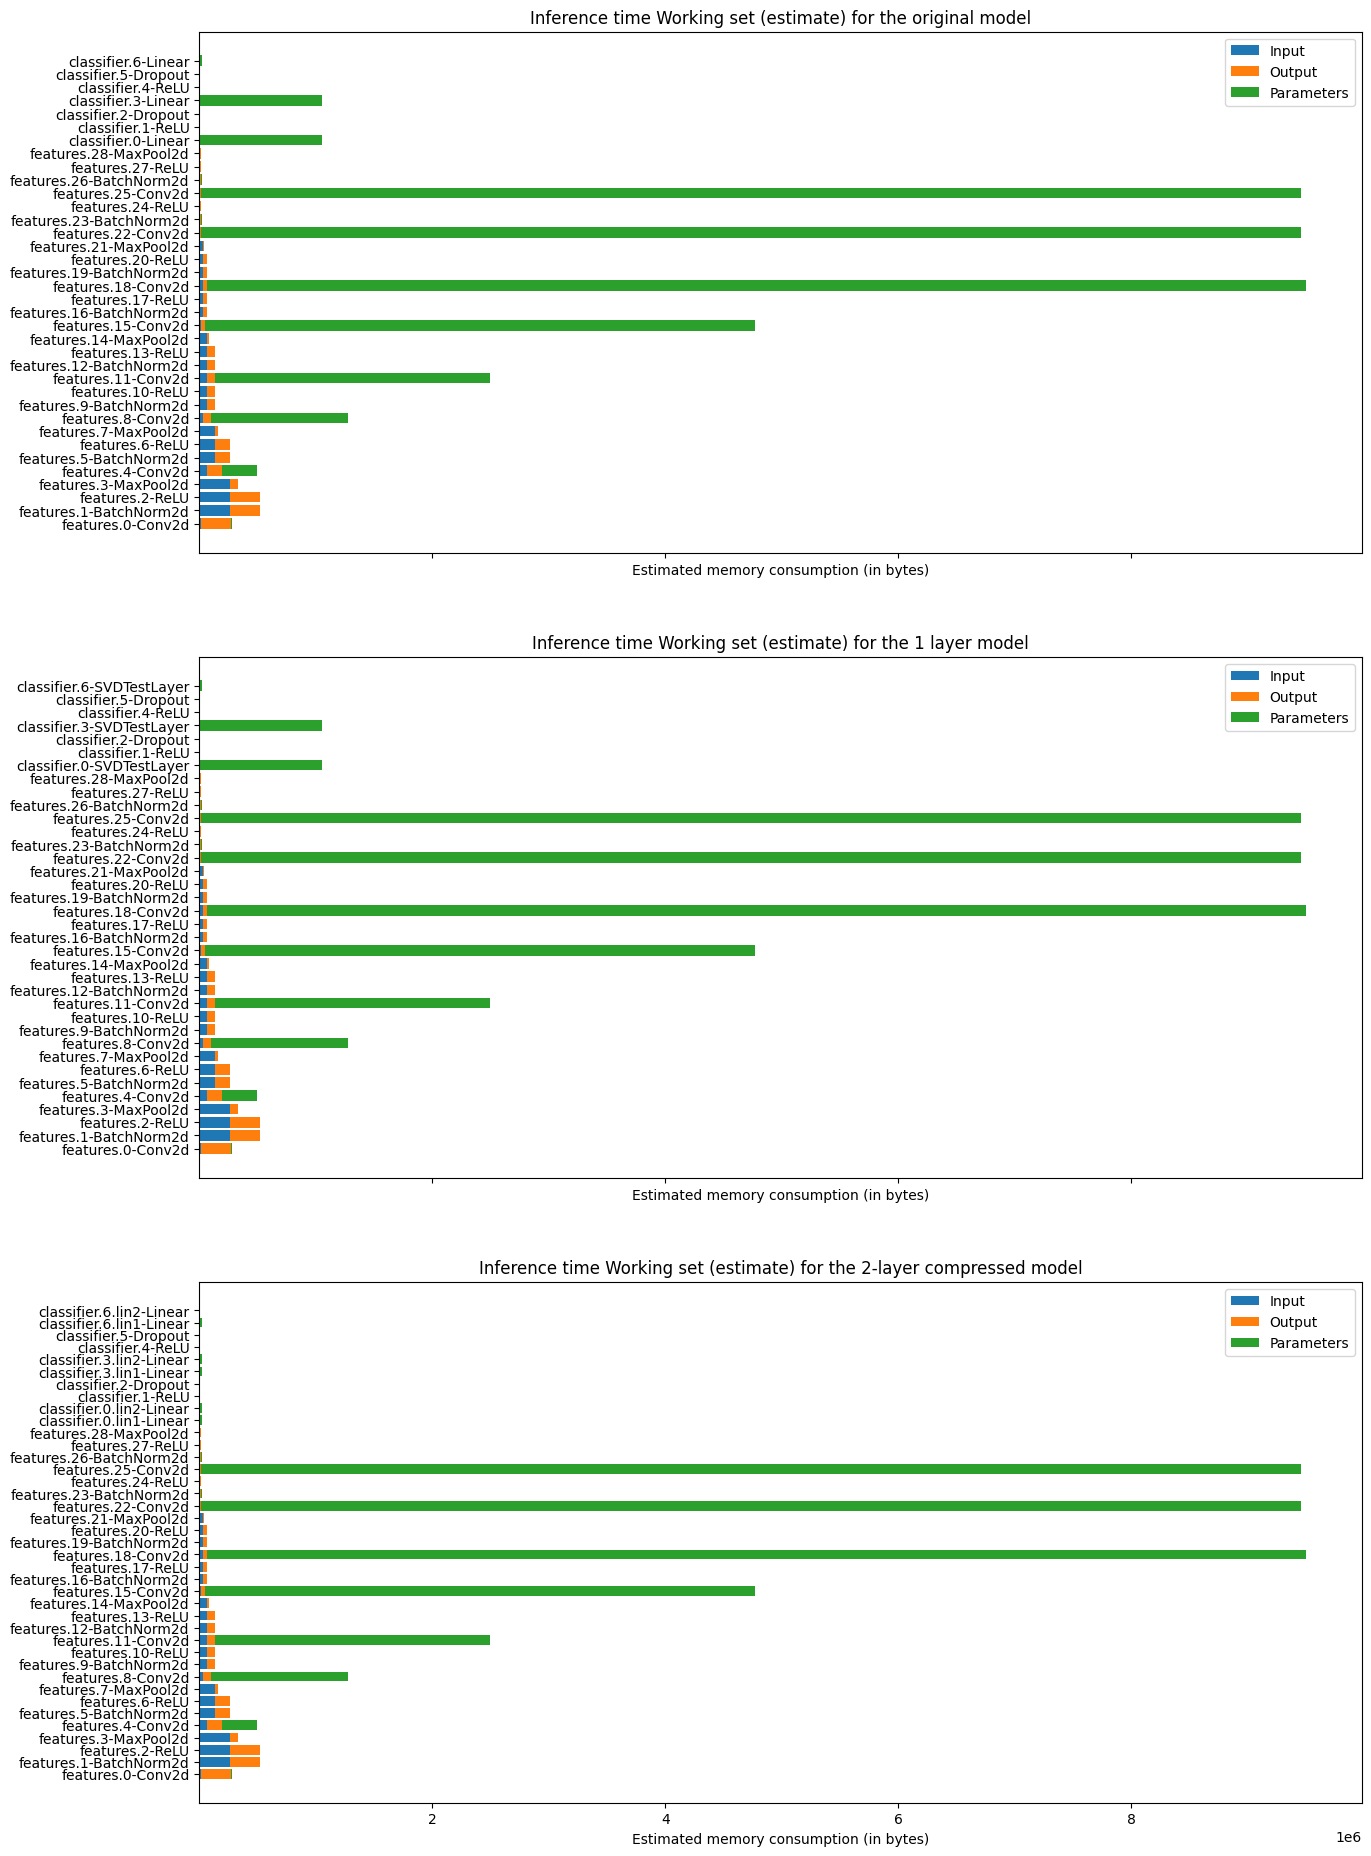

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 23), sharex=True)
display_stats(axes[0], original_shortened_names, original_params_list, original_input_list, original_output_list, title="Inference time Working set (estimate) for the original model")
display_stats(axes[1], new_1_shortened_names,  new_1_params_list,  new_1_input_list, new_1_output_list, title="Inference time Working set (estimate) for the 1 layer model")
display_stats(axes[2], new_2_shortened_names,  new_2_params_list,  new_2_input_list, new_2_output_list, title="Inference time Working set (estimate) for the 2-layer compressed model")
plt.show()

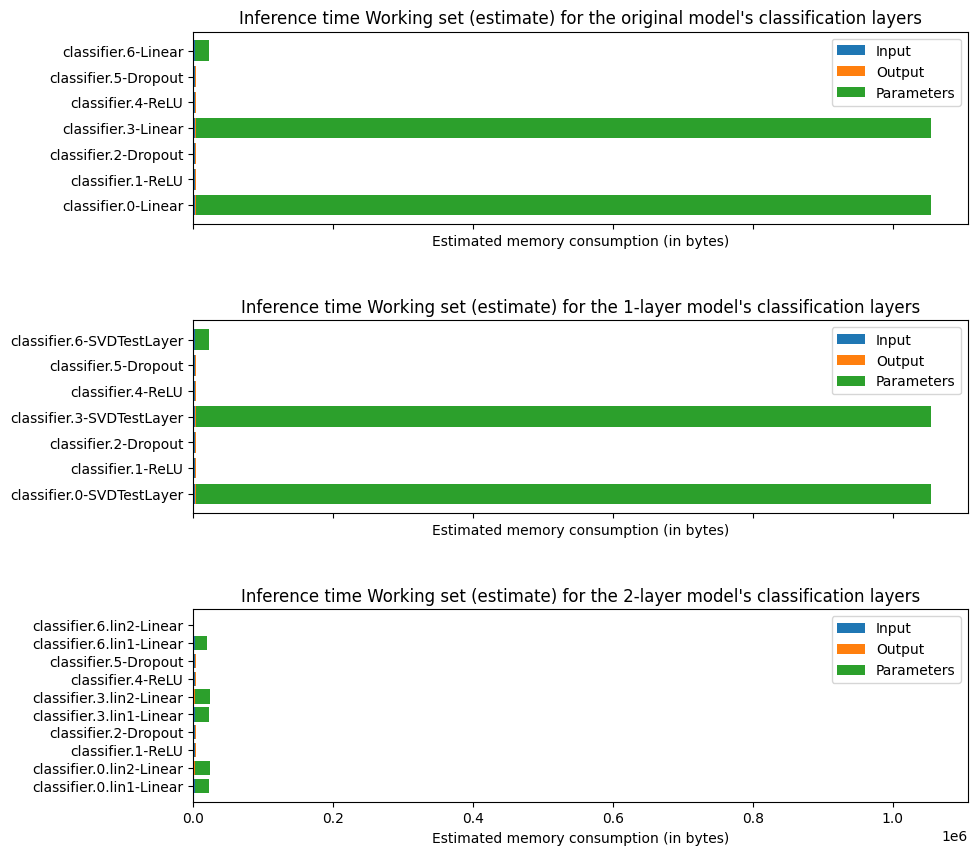

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=.5)
display_stats(axes[0], original_shortened_names[-7:], original_params_list[-7:], original_input_list[-7:], original_output_list[-7:], title="Inference time Working set (estimate) for the original model's classification layers")
display_stats(axes[1], new_1_shortened_names[-7:], new_1_params_list[-7:], new_1_input_list[-7:], new_1_output_list[-7:], title="Inference time Working set (estimate) for the 1-layer model's classification layers")
display_stats(axes[2], new_2_shortened_names[-10:],  new_2_params_list[-10:],  new_2_input_list[-10:], new_2_output_list[-10:], title="Inference time Working set (estimate) for the 2-layer model's classification layers")
plt.show()

As we can see with our estimates, the size of the inference-time, per-layer working set for the classification layers did NOT change with respect to the baseline model when we just performed SVD and put it back in the weight matrix, but it decreased by *almost two orders of magnitude* with the 2-layer implementation, while still maintaining the same performance (in terms of accuracy). In fact, the peak working set sizes of the two big classification layers, i.e. layers 0 and 3, are reduced from more than 1MB to 20KB. The reduction for layer 6 is rather small, but this is as expected as we couldn't optimise much further above the estimated rank without suffering from loss in performance.

However, in this particular case, the memory bottleneck is not at the fully-connected layers, but at the convolution layer, so globally the amount of savings we make is limited.

In [ ]:
original_params_list[-7:], new_1_params_list[-7:], new_2_params_list[-10:]

([1050624, 0, 0, 1050624, 0, 0, 20520],
 [1050624, 0, 0, 1050624, 0, 0, 20520],
 [20480, 22528, 0, 0, 20480, 22528, 0, 0, 18432, 400])

## Retraining


Re-training your SVD decompositions. This part will follow the following steps.
  * Implement the backwards pass of the two-layer approach to supporting SVD-based weight decomposition.
  * Re-train the AlexNet model with both fully-connected layers using this two-layer implementation *(note, you must re-train all model parameters, not just those related to the fully-connected layers)*. Did test accuracy improve? *(please use the 128-example subset of ImageNet used earlier)*. If you observe an improvement discuss why this is the case.
  * Comment on the similarity and design considerations of your modified version of AlexNet to the MobileNet architecture discussed in lectures.

Note that the first step has already been done with the ingeneous Pytorch API. The second step will be done by both retraining VGG11 from scratch (which is my interpretation of the question) and fine-tuning it with a smaller $k$. We finally include a discussion about similarity and differences between our modified VGG and MobileNet.

#### Setup

**Data**

In [ ]:
batch_size = 64

In [ ]:
from torch.utils.data import sampler

In [ ]:
# from https://github.com/chenyaofo/image-classification-codebase/blob/master/codebase/data/cifar.py
def get_train_transforms(mean, std):
    return T.Compose([
        T.RandomCrop(32, padding=4),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(mean=mean, std=std)
    ])


In [ ]:
train_dataset = torchvision.datasets.CIFAR10("./CIFAR-10-data/train", train=True, download=True, transform=get_train_transforms(mean, std))
val_dataset = torchvision.datasets.CIFAR10("./CIFAR-10-data/train", train=True, download=True, transform=get_val_transforms(mean, std))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
random_split = torch.randperm(50000)
train_indices = random_split[:49000]
val_indices = random_split[49000:]

In [ ]:
def get_train_dataloader():
  train_sampler = sampler.SubsetRandomSampler(train_indices)
  train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                            batch_size=batch_size,
                                            shuffle=False,  sampler = train_sampler)
  return train_dataloader

def get_val_dataloader():
  val_sampler = sampler.SubsetRandomSampler(val_indices)
  val_dataloader = torch.utils.data.DataLoader(val_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,  sampler = val_sampler)
  return val_dataloader

**Model**

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 14.2 MB/s eta 0:00:00


In [ ]:
model_to_train = copy.deepcopy(model_svd_with_saving)
model_to_train.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
# Standard initialisation taken from the original repo: https://github.com/chenyaofo/pytorch-cifar-models/blob/d1c8e99b911da7d412979600c84d2a4fe3728473/pytorch_cifar_models/vgg.py#L88
def initialize_weights(model) -> None:
  for m in model.modules():
      if isinstance(m, torch.nn.Conv2d):
          torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
          if m.bias is not None:
              torch.nn.init.constant_(m.bias, 0)
      elif isinstance(m, torch.nn.BatchNorm2d):
          torch.nn.init.constant_(m.weight, 1)
          if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)
      elif isinstance(m, torch.nn.Linear):
          torch.nn.init.normal_(m.weight, 0, 0.01)
          if m.bias is not None:
            torch.nn.init.constant_(m.bias, 0)

In [ ]:
# Reinitialise the weights
initialize_weights(model_to_train)
get_accuracy(model_to_train)

(0.1032,
 {'plane': 10.9,
  'car': 7.4,
  'bird': 6.2,
  'cat': 14.2,
  'deer': 1.7,
  'dog': 16.6,
  'frog': 15.2,
  'horse': 0.3,
  'ship': 2.3,
  'truck': 28.4})

#### Retraining from scratch

This section aims the verify that we get similar results to Xue et al. 2013 (https://www.microsoft.com/en-us/research/wp-content/uploads/2013/01/svd_v2.pdf), i.e. that retraining a model from scratch with the same model shape as my previous model with $k_0 = k_3 = 10$ and $k_6$ = 9 should **give worse results** -- likely because it is easier and more likely for the model to converge to local minima which are less good than the one the model converged to with a sparse high dimensional representation of the weights.

In [ ]:
import torch.optim as optim
import torchmetrics
from tqdm.notebook import tqdm

In [ ]:
epochs = 100

In [ ]:
def train_model(model, epochs, device, use_sgd_with_lr = None):
  train_dataloader = get_train_dataloader()
  val_dataloader = get_val_dataloader()

  model = model.to(device)

  criterion = torch.nn.CrossEntropyLoss()
  accuracy = torchmetrics.Accuracy('multiclass', num_classes=10).to(device)
  optimizer = optim.Adam(model.parameters()) if use_sgd_with_lr is None else optim.SGD(model.parameters(), use_sgd_with_lr)

  train_losses = []
  train_accs = []
  val_losses = []
  val_accs = []

  with tqdm(range(epochs)) as t_global:
    for e in t_global:
      losses = []
      accs = []
      for (x, target) in tqdm(train_dataloader):
        optimizer.zero_grad()
        x = x.to(device)
        target = target.to(device)
        output = model(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        with torch.no_grad():
          losses.append(loss.detach().cpu())
          accs.append(accuracy(output, target).detach().cpu())
      with torch.no_grad():
        # train data
        train_loss = np.mean(losses)
        train_acc = np.mean(accs)
        # val loss, val acc
        _val_losses = []
        _val_accs = []
        for (x, target) in val_dataloader:
          x = x.to(device)
          target = target.to(device)
          output = model(x)
          _val_losses.append(criterion(output, target).detach().cpu())
          _val_accs.append(accuracy(output, target).detach().cpu())
        val_loss = np.mean(_val_losses)
        val_acc = np.mean(_val_accs)
        t_global.set_postfix({'Train loss': train_loss, 'Train acc': train_acc, 'Val loss': val_loss, 'Val acc': val_acc})
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
  return train_losses, train_accs, val_losses, val_accs

In [ ]:
train_losses, train_accs, val_losses, val_accs = train_model(model_to_train, epochs, device)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

In [ ]:
def display_results(model_name, train_losses, train_accs, val_losses, val_accs):
  fig, axs = plt.subplots(2, 1, sharex=True)

  fig.subplots_adjust(hspace=.5)


  axs[0].plot(range(epochs), train_losses, label="train loss")
  axs[0].plot(range(epochs), val_losses, label="val loss")
  axs[0].legend()
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Cross entropy loss")
  axs[0].set_title(f"Train and Val loss wrt epochs for model {model_name}")

  axs[1].plot(range(epochs), train_accs, label="train accuracies")
  axs[1].plot(range(epochs), val_accs, label="val accuracies")
  axs[0].set_xlabel("Epochs")
  axs[0].set_ylabel("Accuracy")
  axs[1].legend()
  axs[1].set_title(f"Train and Val accuracy wrt epochs for model {model_name}")

  plt.show()

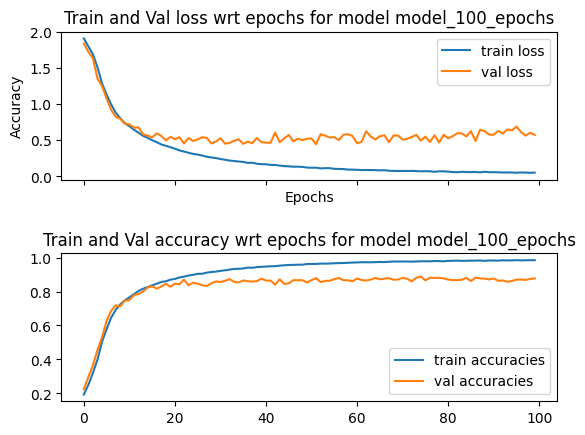

In [ ]:
display_results("model_100_epochs", train_losses, train_accs, val_losses, val_accs)

We first trained for 100 epochs. Clearly the model is overfitting after 30 epochs.

In [ ]:
model_to_train.eval()
get_accuracy_128(model_to_train)

(0.875,
 {'plane': 69.23076923076923,
  'car': 80.0,
  'bird': 81.81818181818181,
  'cat': 73.33333333333333,
  'deer': 80.0,
  'dog': 100.0,
  'frog': 89.47368421052632,
  'horse': 100.0,
  'ship': 100.0,
  'truck': 100.0})

Let's train the model again, this time only up to 30 epochs.

In [ ]:
get_accuracy_128(model_svd_with_saving)

(0.9375,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 90.9090909090909,
  'cat': 100.0,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 94.73684210526316,
  'horse': 84.61538461538461,
  'ship': 100.0,
  'truck': 100.0})

In [ ]:
model_to_train_30 = copy.deepcopy(model_svd_with_saving)
model_to_train_30.train()
initialize_weights(model_to_train_30)
epochs = 30

In [ ]:
get_accuracy_128(model_to_train_30)

(0.0546875,
 {'plane': 0.0,
  'car': 20.0,
  'bird': 9.090909090909092,
  'cat': 6.666666666666667,
  'deer': 0.0,
  'dog': 0.0,
  'frog': 5.2631578947368425,
  'horse': 0.0,
  'ship': 0.0,
  'truck': 18.181818181818183})

In [ ]:
train_losses_30, train_accs_30, val_losses_30, val_accs_30 = train_model(model_to_train_30, epochs, device)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

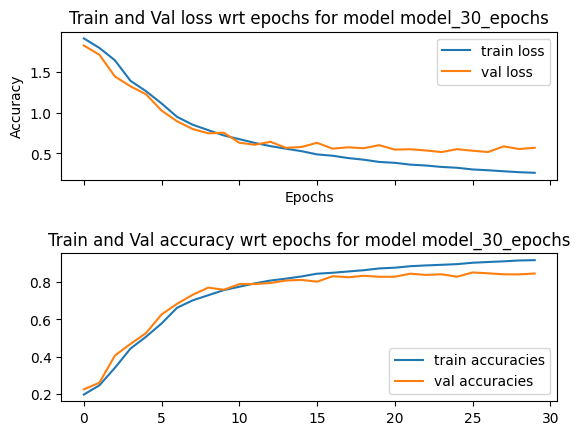

In [ ]:
display_results("model_30_epochs", train_losses_30, train_accs_30, val_losses_30, val_accs_30)

In [ ]:
get_accuracy_128(model_to_train_30)

(0.875,
 {'plane': 92.3076923076923,
  'car': 90.0,
  'bird': 81.81818181818181,
  'cat': 73.33333333333333,
  'deer': 90.0,
  'dog': 77.77777777777777,
  'frog': 78.94736842105263,
  'horse': 92.3076923076923,
  'ship': 100.0,
  'truck': 100.0})

It turns out that we do indeed get inferior results, which verify the results of Xue et al.

### Fine tuning?

Now there is a *final* question that we haven't really considered, which is also a final question considered by Xue et al. We have chosen the values for $k$ (and thence decided how much saving we can get) so that we don't get any significant loss of performance after we apply this compression. But can we go further? Can we try with a really small $k$, enable significant savings, *and* at the same time use fine-tuning to recover the original accuracy? This is what we shall explore here, by setting $k=5$.

In [ ]:
model_svd_to_fine_tune = copy.deepcopy(model_svd)
assert not model_svd_to_fine_tune.training
model_svd_to_fine_tune.classifier[0] = SVDLayer(model_svd_to_fine_tune.classifier[0], 5)
model_svd_to_fine_tune.classifier[3] = SVDLayer(model_svd_to_fine_tune.classifier[3], 5)
model_svd_to_fine_tune.classifier[6] = SVDLayer(model_svd_to_fine_tune.classifier[6], 5)
model_svd_to_fine_tune

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
get_accuracy_128(model_svd_to_fine_tune)

(0.4765625,
 {'plane': 0.0,
  'car': 80.0,
  'bird': 90.9090909090909,
  'cat': 93.33333333333333,
  'deer': 90.0,
  'dog': 88.88888888888889,
  'frog': 0.0,
  'horse': 92.3076923076923,
  'ship': 0.0,
  'truck': 0.0})

In [ ]:
epochs = 20

In [ ]:
model_svd_to_fine_tune.train()
train_losses_ft, train_accs_ft, val_losses_ft, val_accs_ft = train_model(model_svd_to_fine_tune, epochs, device)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

  0%|          | 0/766 [00:00<?, ?it/s]

In [ ]:
model_svd_to_fine_tune.eval();

In [ ]:
get_accuracy_128(model_svd_to_fine_tune)

(0.9296875,
 {'plane': 84.61538461538461,
  'car': 90.0,
  'bird': 81.81818181818181,
  'cat': 93.33333333333333,
  'deer': 90.0,
  'dog': 100.0,
  'frog': 89.47368421052632,
  'horse': 100.0,
  'ship': 100.0,
  'truck': 100.0})

In [ ]:
count_parameters(model_svd_to_fine_tune.classifier)

13884

#### Discussion

Interestingly, we clearly see that fine-tuning a model with even smaller $k=5$ (so in theory, even lower max rank for the weight matrices than for the model in the previous section) significantly boosts its performance. In fact, starting at 47%, the accuracy converges to about the same value as the original model and the compressed model's respective accuracies, with a final test accuracy of almost 93% on the 128-element test set.

This also enables a *very* substantial parameter saving: we get from around 25000 parameters across three layers to 13884, another 50% saving.

However, **why might this work**?

On one hand, fine-tuning is better than just training from scratch likely because the decomposed and compressed pretrained weights provide an initialisation that already solves a considerable number of subtasks of our original task: with an accuracy of > 80% in 6 classes out of 10 in our test set. This initialisation likely nudges the model to avoid the local minima that we would have encountered with random initialisation, and evolve towards the sink that corresponds to that of the original model in the loss landscape.

On the other hand, we might rightfully ask *why* fine-tuning can still squeeze out additional performance, given that we have seen from the singular values chart that e.g. for layer 0, all 10 of the biggest singular values seemed to be needed to maintain the model's performance. In a way, this should mean that the remaining space is very dense and that we can only represent this data in a space with this many dimensions.

Then why is this happening? I fail to have a good intuition of what is happening, but I would conjecture that maybe it's the representation fed into the classifier that is still sparse or can still be compressed.

As seen earlier, we have hypothesised that certain features relevant to determining the membership of certain classes depends on certain singular values not being removed; removing them completely disables the recognition of individual classes, instead of reducing the accuracy for all of them uniformly.

With a lower $k$ than the threshold determined previously (10 for layer 0 and 3, 9 for layer 6), we lose the recognition of certain classes of images completely (4 to be precise, when $k=5$). With fine-tuning, this forces the layers before the fully-connected layers to learn a more condensed representation of the features before feeding them into the classification layers, so that they can act like the components along the singular vectors we have removed. This way, we recover the ability to recognise those classes.

This might be why, with enough epochs, we can still squeeze out more performance out of the network even when compressed to this extent.



### Design comparison with MobileNet

MobileNets have 2 distinguishing features: *factorised convolutions* and *model shrinking hyperparameters*, which are analogous (in terms of design) to what we have by performing SVD and splitting a layer into two.

To be more precise, in MobileNets, instead of having conventional, expensive convolution layers, we replace them with two layers: a depth-wise convolution layer, and a point-wise convolution layer to combine the depth-wise results into features. This is analogous to us splitting a linear layer into two linear layers via SVD. The total cost of that particular operation then becomes additive, and under certain conditions on the hyperparameters of the layers, can achieve great savings.

Moreover, both cases introduce inductive bias to the network: in MobileNets, the design only allows the model to learn **depth-wise separable convolutions**; in our network, as we see when we do fine-tuning, we also get inductive bias in terms of the (maximum) rank of the weight matrix.

However, MobileNets' design is different from using SVD in that it is introducing this inductive bias *a priori*, so can not only save inference time resources but also training resources, whereas we are only factoring *a posteriori*, so can only make savings in terms of inference time resources. In fact, it has been shown that a randomly initialised network with the shape of the SVD-compressed network often can't recover the performance of the original network and gets stuck in an alternative local minimum.

Finally, MobileNet provides additional compression via model shrinking hyperparameters, the width multiplier (shrinking the input/output channel width) and the resolution multiplier (shrinking the resolution of the feature maps), which help further shrink the model size. In our case, the hyperparameter $k$ (denoting the number of singular values and their associated singular vectors we preserve) is also here to help shrink the model size arbitrarily, whilst balancing a performance-cost tradeoff. Of course, it is important to note that this $k$ is often required to be less than its default (maximum) value, the rank of the weight matrix, for our optimisation to be remotely effective. This differs from MobileNet, where those hyperparameters are here to make further savings, but aren't required per se.